# Домашнее задание по теме "Корреляция и корреляционный анализ"

### Задание

1. Возьмите датасет с цветками iris'a (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказание для тестовой выборки и центры классов (разделяющую плоскость можно не строить, но обратите внимание, что класса 3)
6. Отбросьте целевую переменную и оставьте только два признака -  sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

### Решение

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [30]:
flowers = load_iris()

In [31]:
print(flowers.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
# загружаем данные в датафрейм
data = pd.DataFrame(flowers.data, columns=flowers.feature_names)
data_class = flowers.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [55]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, variety_train, variety_test = train_test_split(data, data_class, test_size=0.25)

In [57]:
len(variety_test)

38

In [43]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
# создадим класс, далее будем применять различные методы для этого класса
lda = LinearDiscriminantAnalysis()

In [58]:
# обучаем данные
lda.fit(X_train, variety_train)

LinearDiscriminantAnalysis()

In [46]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0])

In [59]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([variety_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,2,2
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1
8,1,2
9,1,1


In [48]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов (но когда один класс преобладает над другим, надо пользоваться другой метрикой)


from sklearn.metrics import accuracy_score

In [61]:
# точность нашей модели (количество верных на общее количество)
accuracy_score(variety_test, lda.predict(X_test))

0.7894736842105263

In [62]:
# коэффициенты дискриминатных линий 3 линии отделяющие классы друг от друга и 2 числа - два признака
lda.coef_

array([[-6.62725716,  8.37736666],
       [ 1.55730824, -3.50476503],
       [ 4.29037931, -3.80631225]])

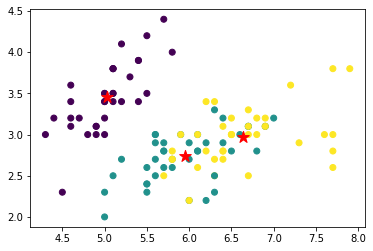

In [68]:
# Визуализируем предсказание для тестовой выборки и центры классов 
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=variety_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [80]:
data = data[['sepal length (cm)', 'sepal width (cm)']]

In [69]:
X = data[['sepal length (cm)']]
Y = data[['sepal width (cm)']]

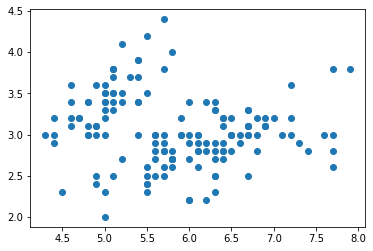

In [75]:
plt.scatter(X, Y)

In [76]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [82]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

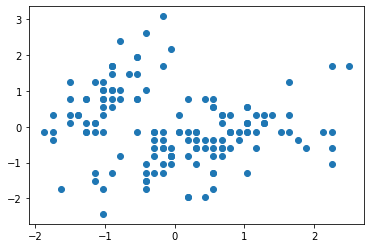

In [84]:
plt.scatter(X_scaled, Y_scaled)

In [85]:
from sklearn.cluster import KMeans

In [96]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled, Y_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1])

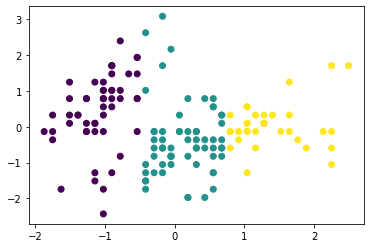

In [97]:
plt.scatter(X_scaled, Y_scaled, c=clusters)

In [99]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, Y_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

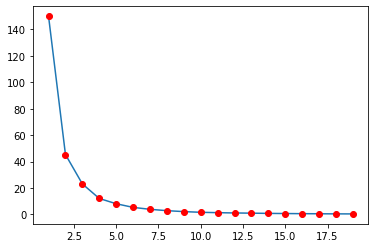

In [101]:
#видно, что изгиб локтя на 3 будет оптимальным
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')